In [1]:
import numpy as np
import torch
from PIL import Image, ImageDraw, ImageFont
from torchvision.ops import box_convert

import groundingdino.datasets.transforms as T
from groundingdino.models import build_model
from groundingdino.util import box_ops
from groundingdino.util.slconfig import SLConfig
from groundingdino.util.utils import clean_state_dict, get_phrases_from_posmap
from groundingdino.util.inference import annotate, load_image, predict, load_model

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
IMAGE_PATH = "../assets/meow_and_woof.jpg"
TEXT_PROMPT = "dog. cat."
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

In [3]:
model = load_model(model_config_path="../../models/dino/config/GroundingDINO_SwinT_OGC.py", model_checkpoint_path="../../models/dino/weights/groundingdino_swint_ogc.pth", device="cpu")

/Users/michaelb/Projects/python/image-caption-generator/.venv/lib/python3.10/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/TensorShape.cpp:3550.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


/Users/michaelb/Projects/python/image-caption-generator/.venv/lib/python3.10/site-packages/transformers/modeling_utils.py:993: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/Users/michaelb/Projects/python/image-caption-generator/.venv/lib/python3.10/site-packages/torch/utils/checkpoint.py:460: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/Users/michaelb/Projects/python/image-caption-generator/.venv/lib/python3.10/site-packages/torch/utils/checkpoint.py:90: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn(


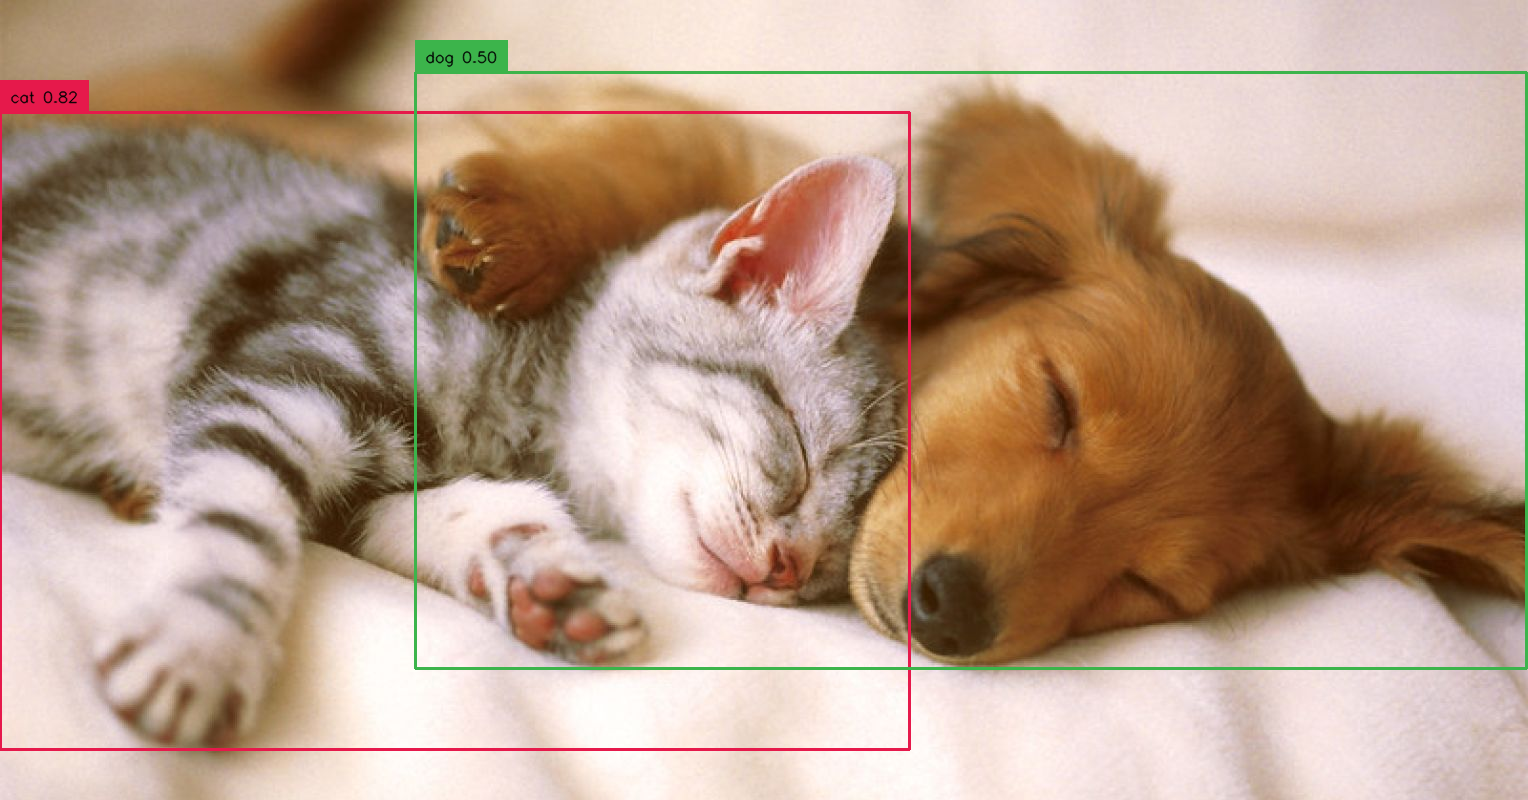

In [4]:
from groundingdino.util.inference import load_model, load_image, predict, annotate
import cv2

image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD,
    device="cpu"
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)
Image.fromarray(annotated_frame[..., ::-1])